In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats as st
import gdown

In [5]:
df = pd.read_csv('training.csv')
test = pd.read_csv('cap_data_validation1.csv')

In [6]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_540,Feature_541,Feature_542,Feature_543,Feature_544,Feature_545,Feature_546,Feature_547,Feature_548,Target
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,0.0,NaN,NaN,0.56250,...,0.216696,0.0000,0.000000,Orcs,0.3,0.0,0.294118,0.111111,0.0,0.0
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.0,0.0,0.028192,0.56000,...,0.058615,0.0105,0.000000,Goblins,0.1,1.0,0.235294,0.222222,1.0,0.0
2,0.076923,0.000000,0.8750,0.50000,0.86665,0.0,1.0,0.0,0.027882,0.63335,...,0.000000,0.0000,0.263682,Uruk-hai,0.4,0.0,0.117647,0.222222,0.0,0.0
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.0,0.0,NaN,0.78570,...,0.000000,0.0000,0.000000,Goblins,0.0,1.0,0.117647,0.222222,0.0,0.0
4,0.528846,0.263158,0.9375,0.87500,0.93135,0.0,1.0,0.0,0.027882,0.56865,...,0.033748,0.0130,0.094527,Uruk-hai,0.3,1.0,0.117647,0.666667,1.0,0.0


In [7]:
test.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_539,Feature_540,Feature_541,Feature_542,Feature_543,Feature_544,Feature_545,Feature_546,Feature_547,Feature_548
0,0.033613,0.000000,1.000,0.0,0.7500,0.0,0.0,0.000000,0.031636,0.7500,...,0.041667,0.000000,0.295844,0.000000,Orcs,0.000000,0.0000,0.111111,0.428571,0.0
1,0.075630,0.000000,0.875,0.5,0.9000,0.0,1.0,0.055556,0.031636,0.6000,...,0.083333,0.066456,0.000000,0.107143,Goblins,0.111111,0.3333,0.111111,0.142857,1.0
2,0.109244,0.000000,1.000,0.0,0.7500,0.0,1.0,0.000000,0.000000,0.7500,...,0.000000,0.000000,0.000000,0.000000,Orcs,0.000000,0.0000,0.111111,0.142857,0.0
3,0.100840,0.000000,1.000,0.0,0.9722,0.0,1.0,0.000000,0.031636,0.5278,...,0.458333,0.000000,0.000000,0.137755,Orcs,0.555556,0.0000,0.111111,0.142857,0.0
4,0.058824,0.076923,1.000,0.6,0.9512,0.0,1.0,0.111111,0.451623,0.5488,...,0.125000,0.000000,0.000000,0.000000,Uruk-hai,0.111111,0.0000,0.444444,0.142857,1.0


In [8]:
# Mostrar variables numéricas
numeric_variables = df.select_dtypes(include=['number'])
print("Variables Numéricas:")
print(numeric_variables.columns)

# Mostrar variables categóricas
categorical_variables = df.select_dtypes(include=['object'])
print("\nVariables Categóricas:")
print(categorical_variables.columns)

Variables Numéricas:
Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Feature_539', 'Feature_540', 'Feature_541', 'Feature_542',
       'Feature_544', 'Feature_545', 'Feature_546', 'Feature_547',
       'Feature_548', 'Target'],
      dtype='object', length=538)

Variables Categóricas:
Index(['Feature_82', 'Feature_142', 'Feature_224', 'Feature_233',
       'Feature_249', 'Feature_405', 'Feature_420', 'Feature_443',
       'Feature_466', 'Feature_538', 'Feature_543'],
      dtype='object')


In [9]:
# features with null values
any_null_features = set(df.isna().sum().sort_values(ascending = False).head(128).index)

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
thresholds = np.round(np.linspace(0.5, 1, 50),2)
percentages = []
for threshold in thresholds:
    # Find features with high correlation
    high_corr_features = set()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                high_corr_features.add(colname)
    percentages.append(round(100*len(high_corr_features)/df.shape[1],2))
    #print(threshold)
correlation_percentages = pd.DataFrame({'threshold': thresholds, 'percentage':percentages})

<ipython-input-11-1d107f2efe7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: xlabel='threshold', ylabel='percentage'>

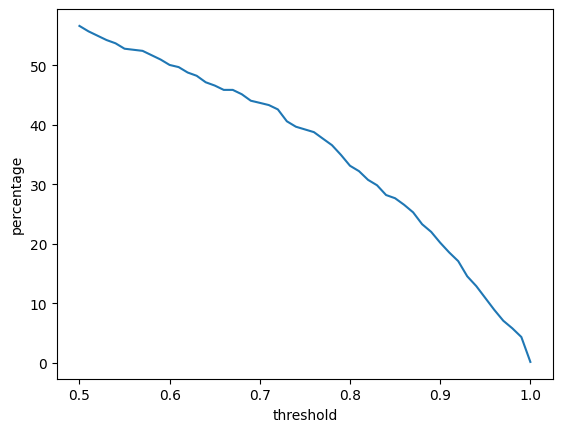

In [12]:
sns.lineplot(data = correlation_percentages, x='threshold',y='percentage')

In [13]:
#we select features with correlation below .85
selected_features = set(df.columns).difference(high_corr_features)
selected_features_ix = list(map(lambda feature: True if feature in list(selected_features) else False, df.columns))

In [14]:
first_reduction_df = df.loc[:,selected_features_ix].copy()

In [15]:
first_reduction_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_540,Feature_541,Feature_542,Feature_543,Feature_544,Feature_545,Feature_546,Feature_547,Feature_548,Target
0,0.144231,0.105263,0.9000,0.66665,0.93750,0.0,0.0,NaN,NaN,0.56250,...,0.216696,0.0000,0.000000,Orcs,0.3,0.0000,0.294118,0.111111,0.000,0.0
1,0.115385,0.000000,0.8750,0.00000,0.94000,0.0,0.0,0.000000,0.028192,0.56000,...,0.058615,0.0105,0.000000,Goblins,0.1,1.0000,0.235294,0.222222,1.000,0.0
2,0.076923,0.000000,0.8750,0.50000,0.86665,0.0,1.0,0.000000,0.027882,0.63335,...,0.000000,0.0000,0.263682,Uruk-hai,0.4,0.0000,0.117647,0.222222,0.000,0.0
3,0.076923,0.000000,0.8750,0.00000,0.71430,0.0,0.0,0.000000,NaN,0.78570,...,0.000000,0.0000,0.000000,Goblins,0.0,1.0000,0.117647,0.222222,0.000,0.0
4,0.528846,0.263158,0.9375,0.87500,0.93135,0.0,1.0,0.000000,0.027882,0.56865,...,0.033748,0.0130,0.094527,Uruk-hai,0.3,1.0000,0.117647,0.666667,1.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.153846,0.000000,0.5000,0.00000,0.50000,0.0,1.0,0.000000,0.334597,1.00000,...,0.000000,0.3077,0.203980,Orcs,0.2,0.0000,0.000000,0.222222,0.000,0.0
1035,0.201923,0.000000,0.8750,0.66665,0.96295,0.0,0.0,0.000000,0.000000,0.53705,...,0.047957,0.0000,0.000000,Goblins,0.5,0.5005,0.117647,0.333333,0.999,0.0
1036,0.057692,0.000000,0.0000,0.00000,0.00000,0.0,1.0,0.000000,0.035913,0.00000,...,0.000000,0.0000,0.000000,Nazgul,0.2,0.0000,0.058824,0.333333,0.000,0.0
1037,0.105769,0.000000,1.0000,0.00000,0.95835,0.0,1.0,0.000000,0.027882,0.54165,...,0.047957,0.0000,0.134328,Balrog,0.2,0.0000,0.117647,0.000000,0.000,0.0


In [16]:
numeric_columns_unique_len = []
for column in numeric_df.columns:
    numeric_columns_unique_len.append(len(numeric_df[column].unique()))
numeric_columns_unique_len_df = pd.DataFrame({
    'feature':numeric_df.columns,
    'unique_len': numeric_columns_unique_len
})
sns.histplot(numeric_columns_unique_len_df.sort_values('unique_len'), binwidth= 1)
plt.xlim(0,40)

NameError: ignored

# Data Transformation

In [ ]:
def convert_to_categorical(data: pd.DataFrame, max_unique_values=20):
    """
    Convert features with 20 or fewer unique values to categorical features in a DataFrame.

    Parameters:
    - data (pd.DataFrame): Input DataFrame.
    - max_unique_values (int): Maximum number of unique values allowed (default is 20).

    Returns:
    - pd.DataFrame: DataFrame with selected features converted to categorical.

    Example:
    ```
    import pandas as pd

    # Create a sample DataFrame
    data = {'Feature1': ['A', 'B', 'A', 'B', 'A'],
            'Feature2': [1, 2, 3, 3, 3],
            'Feature3': [100, 200, 100, 200, 300]}

    df = pd.DataFrame(data)

    # Convert features to categorical
    categorical_df = convert_to_categorical(df)
    ```
    """
    data_aux = data.copy()
    # Identify features with 20 or fewer unique values
    selected_features = data_aux.columns[data_aux.nunique() <= max_unique_values]

    # Convert selected features to categorical
    data_aux[selected_features] = data_aux[selected_features].astype('object')

    return data_aux
